# Metrics

In [19]:
from sklearn.metrics import f1_score, accuracy_score, average_precision_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

def eval_metrics(y_test, y_pred):
    threshold = 0.5
    y_pred = np.where(np.array(y_pred) >= threshold, 1, 0)

    acc = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    precision = average_precision_score(y_test, y_pred)
    cm = confusion_matrix(y_test, y_pred)

    print(f"acc : {acc:.3f}\tf1 : {f1:.3f}\t mean_precision : {precision:.3f}")
    print(cm)
    plt.figure(figsize=(8, 6))
    ax = sns.heatmap(cm, cmap='Blues', annot=True, fmt='d', annot_kws={"color": "black", "size": 12})
    for text in ax.texts:
        text.set_color('white' if int(text.get_text()) > cm.max() / 2 else 'black')

def prediction_plot(X, y_true, y_pred, features):
    x_features = X.keys()

    for i, feature in enumerate(features):
        if feature not in x_features:
            continue
        
        plt.figure(figsize=(100, 10))
        plt.scatter(X[feature], y_true, color='blue', marker='o', label='True', s=[500] * len(y_true))
        plt.scatter(X[feature], y_pred, color='red', marker='x', label='Prediction', s= [500] * len(y_pred))
        plt.xlabel(feature, fontsize=48)
        plt.ylabel('binds', fontsize=48)
        plt.legend(loc='best', fontsize=48)
        plt.xticks(fontsize=48)
        plt.yticks(fontsize=48)
    plt.show()




# Data

In [38]:
import pandas as pd

df_0 = pd.read_csv('dataset/민준이형 피쳐/fold_0.csv')
df_1 = pd.read_csv('dataset/민준이형 피쳐/fold_1.csv')

df = pd.concat([df_0, df_1], axis=0, ignore_index=True)
df = df.drop(['Unnamed: 0'], axis=1)
print(df.shape)
df = df.drop_duplicates()
print(df.shape)
df

(600000, 25)
(600000, 25)


,id,molecule_smiles,ecfp,PEOE_VSA14,SMR_VSA4,EState_VSA7,EState_VSA6,MaxAbsEStateIndex,SPS,SlogP_VSA4,...,VSA_EState4,VSA_EState8,VSA_EState3,VSA_EState5,SlogP_VSA3,SlogP_VSA2,AvgIpc,SMR_VSA5,protein_name,binds
0,45443351,C[C@@]1(C(=O)N[Dy])CCCN1c1nc(NCCN2CC3CCC2C3)nc...,"[0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, ...",-0.123734,0.176769,1.210026,-1.250964,-0.438798,3.032468,-0.569618,...,-0.905851,1.040731,-0.752738,0.953533,-1.112178,0.552501,0.892345,0.930224,sEH,0
1,236536585,CCON(C)C(=O)CNc1nc(NCc2cc(C)nc(Cl)c2)nc(NC(CC(...,"[0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, ...",0.268973,-0.657841,0.178191,0.250603,-0.784674,-0.793433,-0.465571,...,0.328383,0.509424,-0.733440,-0.155447,0.758971,0.141503,-1.612979,0.010214,HSA,0
2,255649662,CCOC(=O)c1c(C)csc1Nc1nc(Nc2ncccc2C#N)nc(N[C@H]...,"[0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",1.059938,-0.657841,0.152876,0.488857,-0.478999,-0.852432,0.706562,...,0.173812,0.331301,0.794024,-0.256609,-0.564274,-1.033086,-0.057884,-0.328940,BRD4,0
3,69025023,Cc1cc([N+](=O)[O-])c(Nc2nc(Nc3c(C#N)cnc4c(C#N)...,"[1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",0.923289,-0.657841,-0.524405,0.965364,-0.656789,-0.885196,4.097092,...,-0.207794,-0.469562,5.613058,-0.541340,-1.112178,-0.909193,0.561424,-0.687733,BRD4,0
4,165738214,CN(C)c1nc(Cl)c(CNc2nc(Nc3cnc(Cl)c(Cl)c3)nc(Nc3...,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",-0.479459,-0.657841,-0.676091,-0.067135,0.905528,-0.840541,-1.181788,...,-1.684926,-1.013920,-0.919140,-0.670299,-0.195333,-0.622270,-0.189057,-1.033136,HSA,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
599995,227929063,CO[C@@H]1COC[C@H]1n1cc(CNc2nc(NCc3nc4c(s3)CCC4...,"[0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",-1.838724,-0.657173,-0.968102,1.601877,0.170117,0.396850,-1.180594,...,0.778739,-0.341562,0.945595,0.029137,3.188841,2.057883,2.436120,0.950762,HSA,1
599996,254502304,O=C(C[C@@H](Cc1cccs1)Nc1nc(NCc2cnc3n2CCOC3)nc(...,"[0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, ...",0.104989,-0.657173,-0.550819,0.429873,-0.971254,-0.316744,-1.180594,...,-0.842781,-0.247716,-0.658579,0.512698,2.459882,0.210138,0.840360,0.305436,HSA,1
599997,17616324,COC(=O)c1ccc(Nc2nc(Nc3ccc4c(c3)CNC4=O)nc(NC(CC...,"[0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",0.588920,0.173690,-0.462279,0.455993,-0.617553,-0.462964,-0.571171,...,0.312797,0.566601,0.957643,-0.557187,0.195560,-0.234054,-0.273350,0.008993,BRD4,1
599998,48103869,CNC(=O)c1ccc(Nc2nc(NCC(C)c3nccs3)nc(Nc3c(Br)cc...,"[0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, ...",0.304974,-0.657173,-0.263886,0.906079,1.798271,-0.790570,0.131465,...,0.014926,0.555535,-0.181184,-0.695591,-1.664277,-0.591776,0.489845,-0.668791,BRD4,1


In [21]:
keys = df.keys()

for idx, val in enumerate(keys):
    print(f"{val} : {idx}", end='\t')
print()

Unnamed: 0 : 0	id : 1	molecule_smiles : 2	ecfp : 3	PEOE_VSA14 : 4	SMR_VSA4 : 5	EState_VSA7 : 6	EState_VSA6 : 7	MaxAbsEStateIndex : 8	SPS : 9	SlogP_VSA4 : 10	MinEStateIndex : 11	MaxEStateIndex : 12	PEOE_VSA8 : 13	VSA_EState7 : 14	EState_VSA4 : 15	VSA_EState4 : 16	VSA_EState8 : 17	VSA_EState3 : 18	VSA_EState5 : 19	SlogP_VSA3 : 20	SlogP_VSA2 : 21	AvgIpc : 22	SMR_VSA5 : 23	protein_name : 24	binds : 25	


In [22]:
from sklearn.model_selection import train_test_split

# preprocess protein_name
proteins = {
    'sEH' : 1,
    'HSA' : 2,
    'BRD4' : 3
}

df[keys[-2]] = df[keys[-2]].apply(lambda x : proteins[x])

columns_idx = list(range(4, 25))
columns = [keys[i] for i in columns_idx]

X = df[columns]
y = df['binds']

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.2, random_state=42)

# test dataset

In [6]:
test_df = pd.read_csv('dataset/test/top20_test.csv')
test_df['protein_name'] = test_df['protein_name'].apply(lambda x : proteins[x])
print(len(test_df))
test_df.head()

1674896


,Unnamed: 0,PEOE_VSA14,SMR_VSA4,EState_VSA7,EState_VSA6,MaxAbsEStateIndex,SPS,SlogP_VSA4,MinEStateIndex,MaxEStateIndex,...,VSA_EState4,VSA_EState8,VSA_EState3,VSA_EState5,SlogP_VSA3,SlogP_VSA2,AvgIpc,SMR_VSA5,id,protein_name
0,0,-0.246673,-0.623854,0.465104,-0.118625,1.311079,-0.950614,0.950076,0.432121,1.311079,...,0.053372,-1.118039,-0.182538,0.992885,-1.048766,-1.254934,-1.784087,-0.725852,295251830,1
1,1,-0.439608,-0.623854,0.465104,-0.118625,-1.412451,-0.941874,0.275458,0.628832,-1.412451,...,0.306171,-1.118039,-0.077728,1.525476,-1.048766,-1.254934,-1.757244,-0.725852,295251831,3
2,2,-0.439608,-0.623854,0.465104,-0.118625,-1.412451,-0.941874,0.275458,0.628832,-1.412451,...,0.306171,-1.118039,-0.077728,1.525476,-1.048766,-1.254934,-1.757244,-0.725852,295251832,2
3,3,-0.439608,-0.623854,0.465104,-0.118625,-1.412451,-0.941874,0.275458,0.628832,-1.412451,...,0.306171,-1.118039,-0.077728,1.525476,-1.048766,-1.254934,-1.757244,-0.725852,295251833,1
4,4,-0.007934,-0.623854,0.465104,-0.363481,-1.408315,-0.941874,0.275458,0.625180,-1.408315,...,0.265192,-1.118039,-0.065027,1.502065,-1.048766,-1.254934,-1.773895,-0.725852,295251834,3


In [26]:
def create_answer(model):
    result_df = pd.DataFrame()
    result_df['id'] = test_df['id']    

    X_test = test_df.drop(['id', 'Unnamed: 0'], axis=1)
    
    y_pred = model.predict(X_test)
    result_df['binds'] = y_pred
    
    return result_df

# Logistic

acc : 0.651	f1 : 0.629	 mean_precision : 0.601
[[170063  70004]
 [ 97630 142303]]


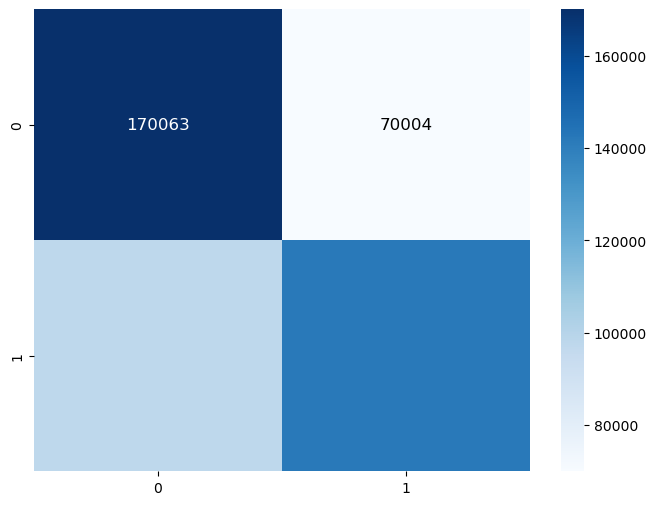

In [8]:
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV

# create model
model = LogisticRegression(penalty='l2', max_iter=500, random_state=42)

# train model
model.fit(X_train, y_train)

# predict model
y_pred = model.predict(X_test)

# evaluation metrics
eval_metrics(y_test, y_pred)

# prediction plot
# prediction_plot(X_test, y_test, y_pred, keys)

# Decision Tree

acc : 0.724	f1 : 0.729	 mean_precision : 0.660
[[169621  70446]
 [ 61997 177936]]


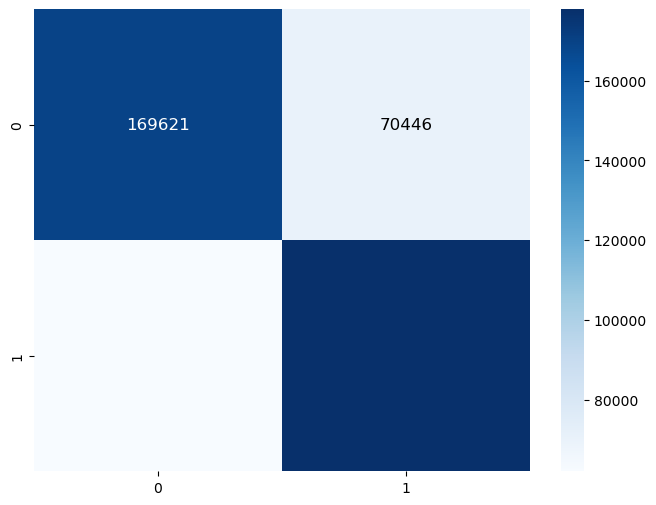

In [9]:
from sklearn.tree import DecisionTreeRegressor
model = DecisionTreeRegressor(criterion='squared_error', max_depth=100, min_samples_split=5)

model.fit(X_train, y_train)

y_pred = model.predict(X_test)

eval_metrics(y_test, y_pred)

acc : 0.734	f1 : 0.734	 mean_precision : 0.672
[[176440  63627]
 [ 64082 175851]]


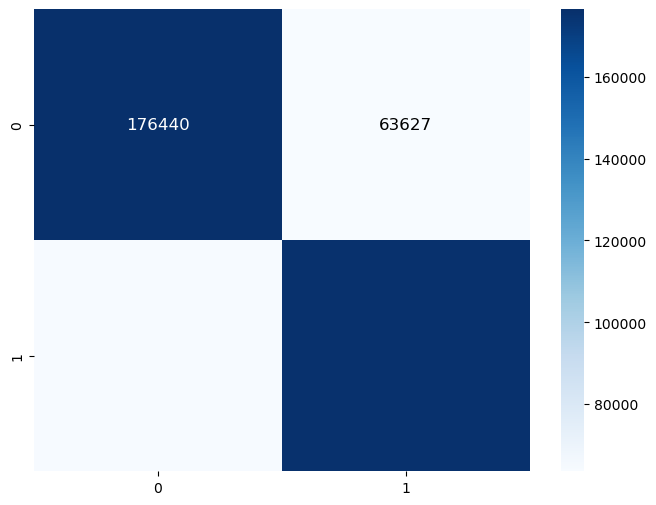

In [10]:
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier(criterion='gini', max_depth = 100, min_samples_leaf=5)

model.fit(X_train, y_train)

y_pred = model.predict(X_test)

eval_metrics(y_test, y_pred)

# RandomForest

acc : 0.825	f1 : 0.814	 mean_precision : 0.781
[[211619  28448]
 [ 55708 184225]]


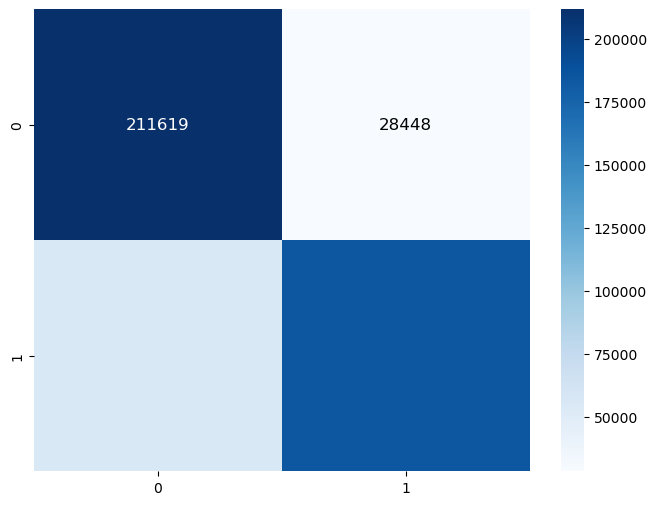

In [11]:
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor

model = RandomForestRegressor(n_estimators=100, criterion='squared_error', max_depth=100, min_samples_leaf=5)

model.fit(X_train, y_train)

y_pred = model.predict(X_test)

eval_metrics(y_test, y_pred)

acc : 0.821	f1 : 0.806	 mean_precision : 0.783
[[215812  24255]
 [ 61478 178455]]


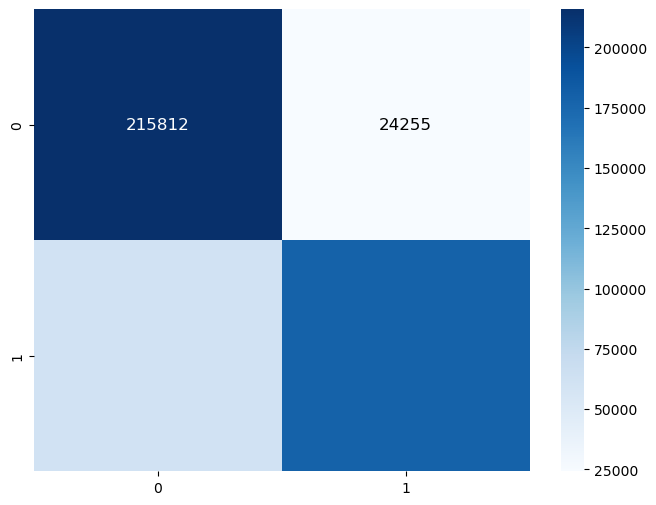

In [12]:
model = RandomForestClassifier(n_estimators=100, criterion='gini', max_depth=100, min_samples_leaf=5)

model.fit(X_train, y_train)

y_pred = model.predict(X_test)

eval_metrics(y_test, y_pred)


# XGBoost

acc : 0.829	f1 : 0.820	 mean_precision : 0.783
[[210192  29875]
 [ 52400 187533]]


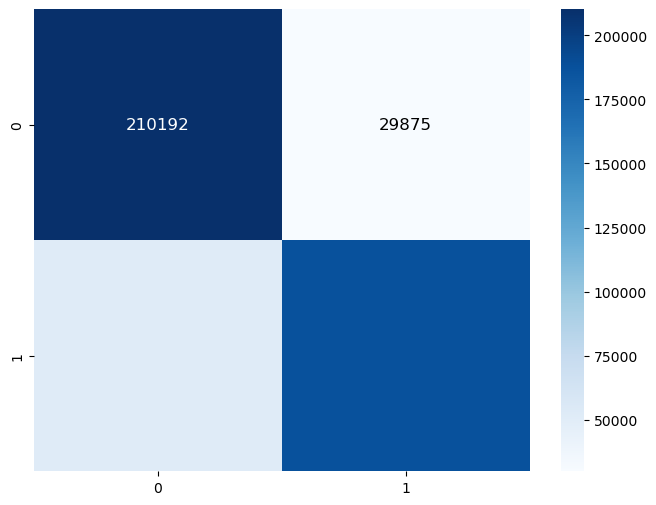

In [34]:
from xgboost import XGBRFRegressor, XGBRFClassifier

model = XGBRFRegressor(n_estimators=100, max_depth=20, learning_rate=0.1, random_state=42)

model.fit(X_train, y_train)

y_pred = model.predict(X_test)

eval_metrics(y_test, y_pred)

In [35]:
# test
model = XGBRFRegressor(n_estimators=100, max_depth=20, learning_rate=0.1, random_state=42)
model.fit(X, y)

result_df = create_answer(model)
result_df

,id,binds
0,295251830,0.465232
1,295251831,0.465355
2,295251832,0.467420
3,295251833,0.462003
4,295251834,0.463365
...,...,...
1674891,296920825,0.460084
1674892,296920826,0.484309
1674893,296920827,0.475449
1674894,296920828,0.471368


In [37]:
result_df.to_csv("result.csv", index=False)
result_df.shape

(1674896, 2)